In [1]:
#For Data preparation
import numpy as np
import pandas as pd
import string

#For exploraotry analysis 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Data CLeanining
import nltk
from nltk.corpus import stopwords 
stops = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
import re

# A size for figures
FIG_SIZE = (14,8)

#Random state for classifiers
RAN_STATE = 42

#For Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


#For model building and selection
from sklearn import model_selection, linear_model, naive_bayes,svm
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyajagarlapoodi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Load JSON file into a data frame
Data= pd.read_excel (r'file:///Users/divyajagarlapoodi/Desktop/Amazon%20books.xlsx')

#To see how the data appears 
Data.head(1)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixreviewTime
0,000100039X,"[0, 0]",5.0,"""Spiritually and mentally inspiring! A book t...","12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000


In [3]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            3317 non-null   object 
 1   helpful         3317 non-null   object 
 2   overall         3317 non-null   float64
 3   reviewText      3317 non-null   object 
 4   reviewTime      3006 non-null   object 
 5   reviewerID      3317 non-null   object 
 6   reviewerName    3312 non-null   object 
 7   summary         3317 non-null   object 
 8   unixreviewTime  3317 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 233.4+ KB
None


In [4]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)
from datetime import datetime

condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")

Data["unixreviewTime"] = Data["unixreviewTime"].apply(condition)


In [5]:
Data.head(1)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixreviewTime
0,000100039X,"[0, 0]",5.0,"""Spiritually and mentally inspiring! A book t...","12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,12-15-2012


In [6]:
print(Data["reviewText"].iloc[25])


 "I first read The Prophet by Kahlil Gibran over 30 years ago and have read it many times since. Gibran's messages are timeless and have always influenced my life and relationships. Over the years I have used it as a gift for persons I cared about. This paperback version has a lovely cover and makes a nice yet inexpensive gift containing valuable lessons for anyone. I purchased three for future giving at the special price offered.", 


In [7]:
print(Data.overall.unique())

[5. 3. 2. 4. 1.]


In [8]:
#Select column 1,2,3 only
df = Data.iloc[:, [2,3,1]]


df['helpful_numerator'] = df['helpful'].apply(lambda x: x[1])
df['helpful_denominator'] = df['helpful'].apply(lambda x: x[4])
#del df['helpful']
print (df.isnull().sum())

overall                0
reviewText             0
helpful                0
helpful_numerator      0
helpful_denominator    0
dtype: int64


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df.describe()

,overall
count,3317.000000
mean,4.380163
std,1.001449
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


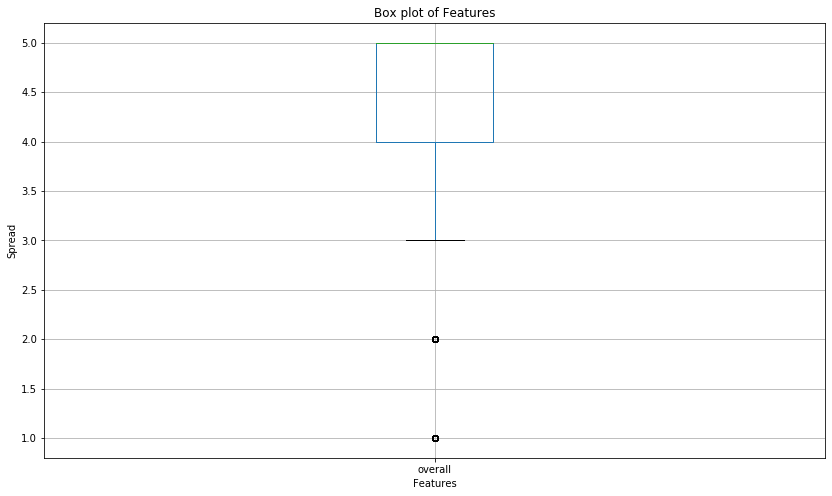

In [10]:
### Box Plot
fig = plt.figure(1,FIG_SIZE)
plt.title('Box plot of Features')
plt.ylabel('Spread')
plt.xlabel('Features')                

# Create the boxplot
df.boxplot()

In [11]:
#NLP Preprocessing
sample_review = Data["reviewText"].iloc[25]
print(sample_review)

 "I first read The Prophet by Kahlil Gibran over 30 years ago and have read it many times since. Gibran's messages are timeless and have always influenced my life and relationships. Over the years I have used it as a gift for persons I cared about. This paperback version has a lovely cover and makes a nice yet inexpensive gift containing valuable lessons for anyone. I purchased three for future giving at the special price offered.", 


In [12]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

 "I first read The Prophet by Kahlil Gibran over 30 years ago and have read it many times since. Gibran's messages are timeless and have always influenced my life and relationships. Over the years I have used it as a gift for persons I cared about. This paperback version has a lovely cover and makes a nice yet inexpensive gift containing valuable lessons for anyone. I purchased three for future giving at the special price offered.", 


In [13]:
pattern = r"\&\#[0-9]+\;"

Data["preprocessed"] = Data["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(Data["preprocessed"].iloc[25])

 "I first read The Prophet by Kahlil Gibran over 30 years ago and have read it many times since. Gibran's messages are timeless and have always influenced my life and relationships. Over the years I have used it as a gift for persons I cared about. This paperback version has a lovely cover and makes a nice yet inexpensive gift containing valuable lessons for anyone. I purchased three for future giving at the special price offered.", 


In [14]:
#Extracting the root word

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
Data["preprocessed"] = Data["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(Data["preprocessed"].iloc[25])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyajagarlapoodi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyajagarlapoodi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyajagarlapoodi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/divyajagarlapoodi/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


I first read The Prophet by Kahlil Gibran over 30 year ago and have read it many time since Gibran s message be timeless and have always influence my life and relationship Over the year I have use it as a gift for person I care about This paperback version have a lovely cover and make a nice yet inexpensive gift contain valuable lesson for anyone I purchase three for future give at the special price offer


In [16]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

Data["preprocessed"] = Data["preprocessed"].apply(remove_accent)

print(Data["preprocessed"].iloc[25])

I first read The Prophet by Kahlil Gibran over 30 year ago and have read it many time since Gibran s message be timeless and have always influence my life and relationship Over the year I have use it as a gift for person I care about This paperback version have a lovely cover and make a nice yet inexpensive gift contain valuable lesson for anyone I purchase three for future give at the special price offer


In [17]:
#removing punctuations
pattern = r"[^\w\s]"

Data["preprocessed"] = Data["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(Data["preprocessed"].iloc[25])

I first read The Prophet by Kahlil Gibran over 30 year ago and have read it many time since Gibran s message be timeless and have always influence my life and relationship Over the year I have use it as a gift for person I care about This paperback version have a lovely cover and make a nice yet inexpensive gift contain valuable lesson for anyone I purchase three for future give at the special price offer


In [18]:
#converting to lower case
Data["preprocessed"] = Data["preprocessed"].str.lower()

print(Data["preprocessed"].iloc[25])

i first read the prophet by kahlil gibran over 30 year ago and have read it many time since gibran s message be timeless and have always influence my life and relationship over the year i have use it as a gift for person i care about this paperback version have a lovely cover and make a nice yet inexpensive gift contain valuable lesson for anyone i purchase three for future give at the special price offer


In [19]:
#removing stop words
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
Data["preprocessed"] = Data["preprocessed"].apply(remove_stop_words)

print(Data["preprocessed"].iloc[25])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

first read prophet kahlil gibran 30 year ago read many time since gibran message timeless always influence life relationship year use gift person care paperback version lovely cover make nice yet inexpensive gift contain valuable lesson anyone purchase three future give special price offer


In [20]:
#Removing extra spaces
pattern = r"[\s]+"

Data["preprocessed"] = Data["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(Data["preprocessed"].iloc[25])

first read prophet kahlil gibran 30 year ago read many time since gibran message timeless always influence life relationship year use gift person care paperback version lovely cover make nice yet inexpensive gift contain valuable lesson anyone purchase three future give special price offer


In [21]:
#Tokenization
corpora = Data["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[25])

['first', 'read', 'prophet', 'kahlil', 'gibran', '30', 'year', 'ago', 'read', 'many', 'time', 'since', 'gibran', 'message', 'timeless', 'always', 'influence', 'life', 'relationship', 'year', 'use', 'gift', 'person', 'care', 'paperback', 'version', 'lovely', 'cover', 'make', 'nice', 'yet', 'inexpensive', 'gift', 'contain', 'valuable', 'lesson', 'anyone', 'purchase', 'three', 'future', 'give', 'special', 'price', 'offer']


In [22]:
#Phase Modeling
!pip install gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [23]:
#unigrams
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['traction', 'familiarize', 'frey', '1987', 'immensely', 'temptation', 'computer', 'integrity', 'elm', 'darker', 'writen', 'literraly', 'nirvana', 'hippie', 'catapult', 'outspoken', 'astute', 'demanding', 'wreck', 'mccabe', 'aggressively', 'obsured', 'favor', 'cognizant', 'unaltered', 'charm', 'convolution', 'inherit', 'heights', 'utah', 'mortality', 'gasp', 'paisonos', 'rain', 'finca', 'orange', 'balloon', 'backwards', 'witth', 'limited', 'bi', 'spangle', 'treatment', 'commercial', 'marketplace', 'evidently', 'composite', 'hating', 'dependable', 'penance']


In [24]:
#bigrams

bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['circus_life', 'nursing_home', 'water_elephants', 'read_book', 'old_man']


In [25]:
#trigrams
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:100])

[]


In [26]:
#creating Vocabulary
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[1:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 1, Token: book
ID: 2, Token: discover
ID: 3, Token: help
ID: 4, Token: inspire
ID: 5, Token: mentally
ID: 6, Token: moral
ID: 7, Token: question
ID: 8, Token: really
ID: 9, Token: spiritually


In [27]:
#count based feature engineering
#Bags of word model
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: allow, Frequency: 1
Word: book, Frequency: 1
Word: discover, Frequency: 1
Word: help, Frequency: 1
Word: inspire, Frequency: 1
Word: mentally, Frequency: 1
Word: moral, Frequency: 1
Word: question, Frequency: 1
Word: really, Frequency: 1
Word: spiritually, Frequency: 1


In [28]:
#TF-IDF model
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: allow, Weight: 0.311
Word: book, Weight: 0.018
Word: discover, Weight: 0.301
Word: help, Weight: 0.249
Word: inspire, Weight: 0.342
Word: mentally, Weight: 0.414
Word: moral, Weight: 0.372
Word: question, Weight: 0.290
Word: really, Weight: 0.128
Word: spiritually, Weight: 0.472


In [29]:
#word embedding for future engineering

import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

In [30]:
#final DataFrame
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
spiritually,0.171284,-0.522237,0.651544,0.143051,0.257835,0.191876,1.054101,-0.040790,-0.003838,0.238336,...,0.008138,0.039581,-0.287178,-0.385406,-0.579939,-0.697268,0.013655,0.002777,-0.287076,-0.483621
mentally,-0.163892,0.855376,0.531337,0.709489,-0.418221,1.431368,0.794108,-0.544463,1.522884,-1.384540,...,-2.190082,0.708865,-0.209458,-0.704568,-0.424631,0.205923,-0.285709,0.097505,0.087485,-0.928644
inspire,-0.346066,-1.485449,0.831445,-0.139075,1.029026,0.613490,3.193810,0.136158,-1.195041,1.339980,...,2.345720,1.056388,0.485107,1.129082,-0.714201,-2.395428,-0.380279,-0.555430,-0.188839,1.948615
book,2.952403,-1.210572,1.060666,-1.777441,0.609761,-1.550756,-0.819858,0.360975,-1.525880,-0.814531,...,3.483757,-0.225754,-0.030921,-0.957644,1.081742,-0.370308,0.100001,1.546712,-2.315853,1.401684
allow,1.247167,3.101405,1.147173,1.269891,-0.236884,-0.382886,1.051649,-0.191114,-0.406774,1.004582,...,-0.605771,-0.201390,0.123852,-0.782246,-1.939812,-1.331572,1.581012,-0.650193,-0.169369,1.165428


In [31]:
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])


In [32]:
model_df = pd.DataFrame(model_array)
model_df["label"] = Data["overall"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.227419,0.258069,0.617770,-0.061389,0.434134,0.085644,1.303763,0.613686,0.457404,0.018474,...,0.924697,-0.077123,-0.259302,-0.593227,-0.605655,0.247173,0.264614,-0.737315,1.144126,5.0
1,0.113464,-0.020510,0.408165,-0.025487,1.076727,-0.332707,0.799275,0.196395,-0.618129,-0.334579,...,-0.299613,0.279553,-0.056307,0.293811,0.281149,0.531571,0.714032,-1.392121,0.671863,5.0
2,0.481658,-0.098467,0.225426,-0.110694,0.810718,-0.685288,0.067618,0.290992,0.085167,-0.468846,...,0.384824,-0.874994,-0.251193,-0.310643,-0.021740,0.237415,1.375000,-0.651180,0.589088,5.0
3,0.333393,-0.437311,-0.202758,0.049935,0.094502,-1.167735,0.811328,0.200510,-0.216531,-0.151257,...,0.536019,-0.346604,-0.343955,0.094247,0.212979,0.238583,0.820689,-1.061637,0.554221,5.0
4,-0.113829,-0.546673,0.304719,0.322478,0.567492,-0.476744,1.038393,0.564121,-0.297777,0.023317,...,0.314567,-0.238690,-0.054755,-0.054152,0.159062,0.448125,0.317290,-1.143505,0.755291,5.0


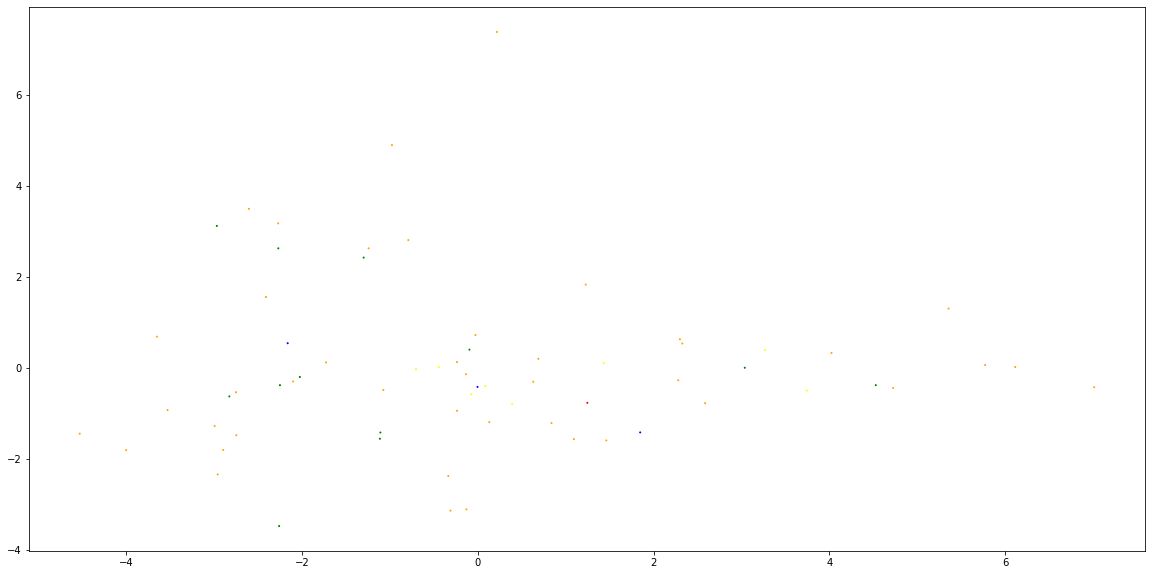

In [33]:
#Principal Component Analysis
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

In [34]:
#Exploratory Data Analysis
#more on word2vec
word_bank = ["spiritual", "reading", "book", "good", "inspiring"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

spiritual: ['poetic' 'wisdom' 'gibran' 'prophet' 'profound']
reading: ['read' 'annalovesbooks' 'listen' 'maui' 'kids']
book: ['read' 'alot' 'dive' 'recommendation' 'loan']
good: ['bad' 'heavier' 'chick' 'lot' 'ridiculously']
inspiring: ['directs' 'simple' 'philosophy' 'enclose' 'poetic']


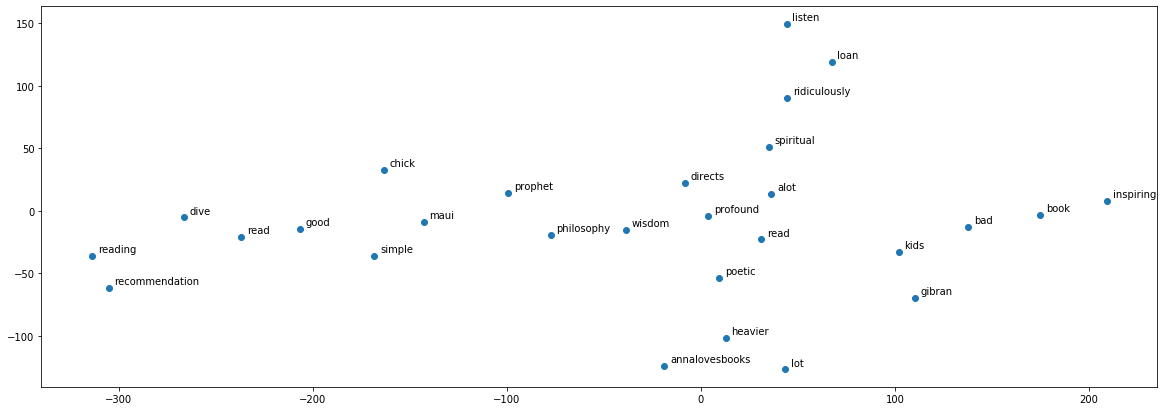

In [35]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

In [36]:
#Word Algebra
#Books + Inspirirng
word_vec.wv.most_similar(positive=["books", "inspiring"], \
                      negative=[], topn=1)

[('bears', 0.6674127578735352)]

In [37]:
#good-reading
word_vec.wv.most_similar(positive=["good"], \
                      negative=["reading"], topn=1)

[('focus', 0.3908172845840454)]

In [38]:
#reading-books
word_vec.wv.most_similar(positive=["reading"], \
                      negative=["books"], topn=1)

[('descriptives', 0.417790025472641)]

In [39]:
#Named Enrity Recognition
helpful = Data["helpful"].tolist()
most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = Data["helpful"].astype(str) == str(most_helpful)
most_helpful_idx = Data[most_helpful_idx].index

most_helpful_text = Data["reviewText"].iloc[most_helpful_idx].values[0]

print(most_helpful_text)

 "Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!", 


In [43]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm 
ner = en_core_web_sm.load()

from collections import defaultdict

#ner = spacy.load("en")

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")


     |████████████████████████████████| 11.1 MB 2.6 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074433 sha256=27b5039566fcd7f4a39ce7f3a77a9f7ce3d15635f10a1af6b87634cae977ec41
  Stored in directory: /private/var/folders/db/20mfqpbj3jg809hw1d2s0tjc0000gn/T/pip-ephem-wheel-cache-h7e3cubu/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [44]:
from spacy import displacy

displacy.render(ner_helpful, style="ent", jupyter=True)

In [45]:
#Dependancy Tree
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

In [46]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[]


In [47]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

In [48]:
for blank in nan_list[0:5]:
    display(df["reviewText"].iloc[blank])

In [49]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 3317
Final 'model_df' count: 3317


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.227419,0.258069,0.617770,-0.061389,0.434134,0.085644,1.303763,0.613686,0.457404,0.018474,...,0.924697,-0.077123,-0.259302,-0.593227,-0.605655,0.247173,0.264614,-0.737315,1.144126,5.0
1,0.113464,-0.020510,0.408165,-0.025487,1.076727,-0.332707,0.799275,0.196395,-0.618129,-0.334579,...,-0.299613,0.279553,-0.056307,0.293811,0.281149,0.531571,0.714032,-1.392121,0.671863,5.0
2,0.481658,-0.098467,0.225426,-0.110694,0.810718,-0.685288,0.067618,0.290992,0.085167,-0.468846,...,0.384824,-0.874994,-0.251193,-0.310643,-0.021740,0.237415,1.375000,-0.651180,0.589088,5.0
3,0.333393,-0.437311,-0.202758,0.049935,0.094502,-1.167735,0.811328,0.200510,-0.216531,-0.151257,...,0.536019,-0.346604,-0.343955,0.094247,0.212979,0.238583,0.820689,-1.061637,0.554221,5.0
4,-0.113829,-0.546673,0.304719,0.322478,0.567492,-0.476744,1.038393,0.564121,-0.297777,0.023317,...,0.314567,-0.238690,-0.054755,-0.054152,0.159062,0.448125,0.317290,-1.143505,0.755291,5.0


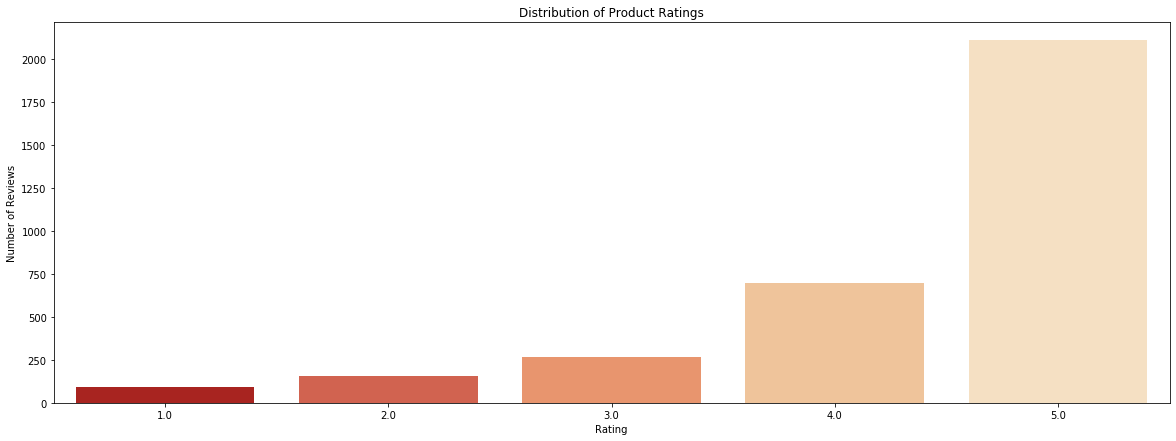

In [50]:
#Dealining with unbalanced data
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=Data["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [51]:
majority = Data["overall"] == 5
majority_ratio = len(Data[majority]) / len(Data)

print(f"{majority_ratio*100:.2f}%")

63.55%


In [52]:
count = len(model_df[model_df["label"] == 2])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 155


In [53]:
#trim the majority class
condition = model_df["label"] == 5
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 90
Size of Class 2: 155
Size of Class 3: 155
Size of Class 4: 155
Size of Class 5: 155


In [54]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
3202,0.186357,-0.177022,0.431207,-0.324417,0.122386,-0.464708,0.210875,-0.353252,-0.504085,-0.237768,...,-0.059352,-0.169741,-0.049034,0.075558,-0.097431,0.310411,0.339811,-0.882855,0.165782,1.0
889,0.115428,0.054102,0.573825,-1.765887,1.163663,-0.671830,0.776529,-0.236127,-0.078711,-0.099604,...,0.296917,-0.343224,-0.378406,0.358629,-0.138249,-0.274703,1.408199,-0.401838,-0.079890,1.0
1019,0.001630,-0.408790,0.486230,-0.837428,0.678575,-0.203998,1.250252,-0.079548,0.262103,-0.219842,...,-0.332604,-0.390433,-0.110150,-0.554005,-0.164211,0.709476,-0.397309,-0.251638,0.515877,1.0
1040,0.394168,0.007991,0.253962,-0.339047,0.612471,-0.732177,0.357902,0.020745,0.197608,-0.821063,...,0.577210,-0.482283,-0.360925,-0.577338,0.290527,0.304456,0.617696,-0.406745,1.871531,1.0
1052,0.204077,-0.255738,-0.176739,-0.136453,0.712729,0.270985,0.357889,0.241114,-0.203289,-0.466160,...,0.401487,0.421596,0.057028,-0.616856,-0.248601,0.201917,0.606333,-0.391312,0.219820,1.0


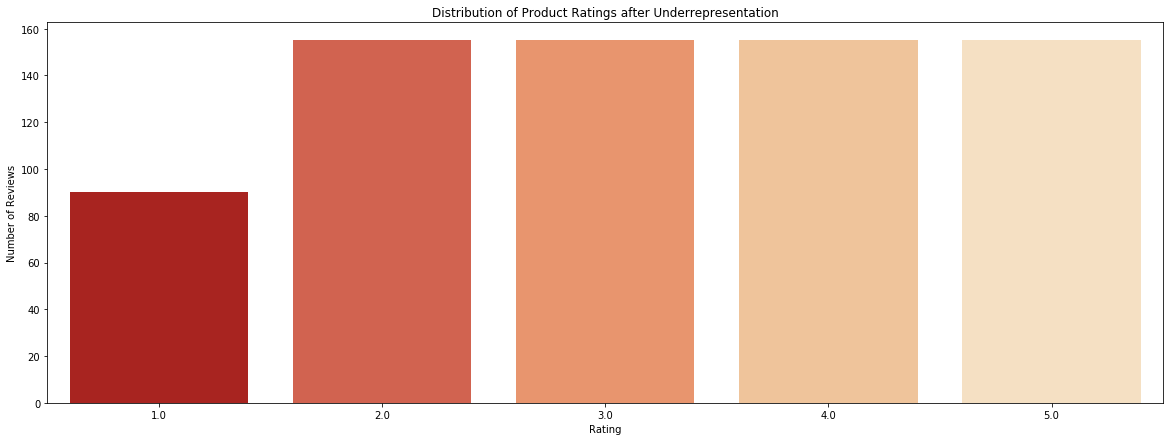

In [55]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [56]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [57]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")


Baseline Accuracy: 21.690%
Baseline F1 Score: 0.217


In [58]:
#Random Forest
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={1:10, 2:12, 3:7, 4:9, 5:1}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={1: 10, 2: 12, 3: 7, 4: 9, 5: 1},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.940%
Training Set F1 Score: 0.999


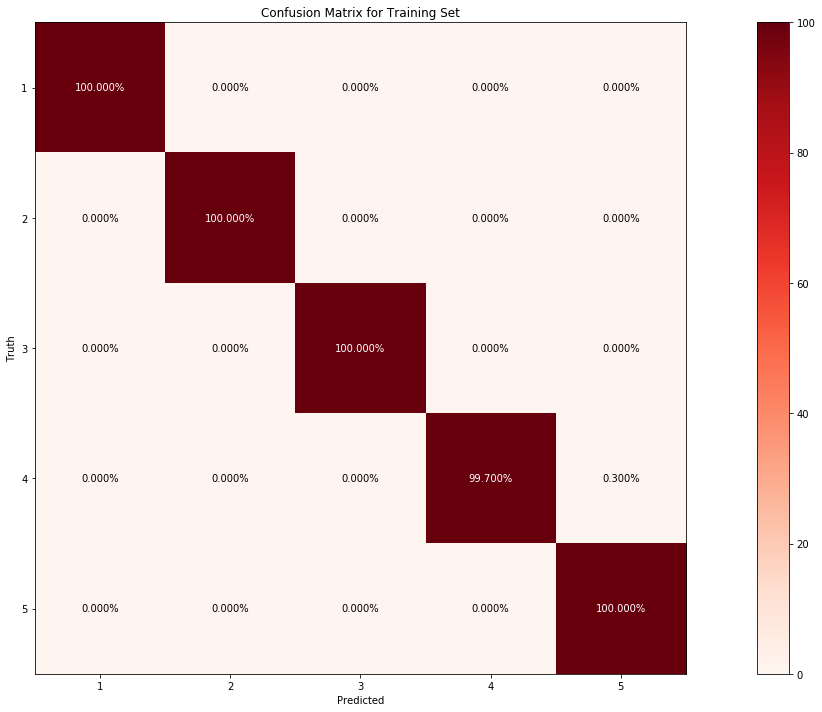

In [61]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [62]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 63.330%
Training Set F1 Score: 0.633


In [65]:
#XG Boost
import xgboost as xgb

from sklearn.model_selection import train_test_split
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

    

In [66]:

y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 100.000%
Training Set F1 Score: 1.000


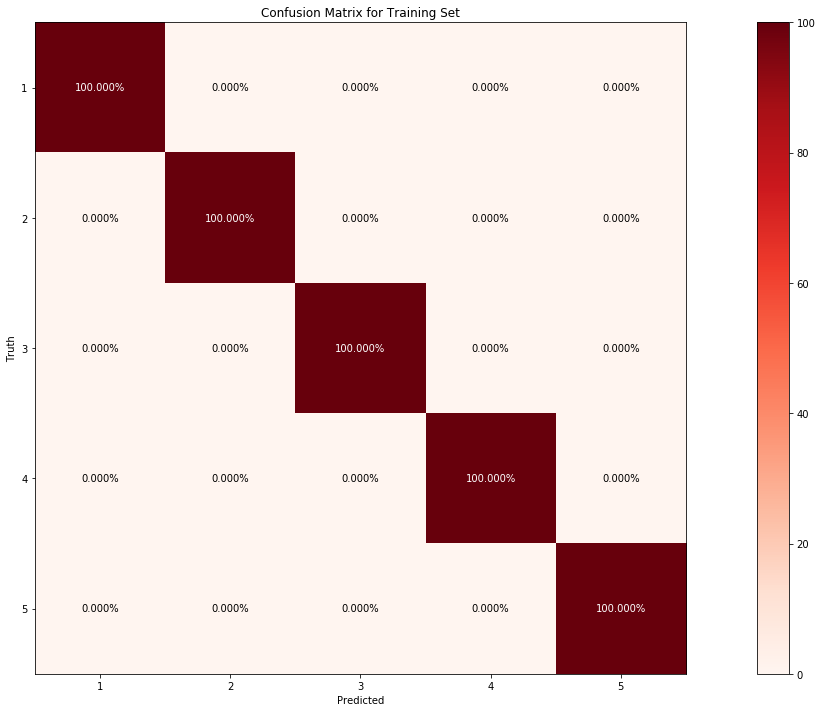

In [67]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [68]:
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.066948,0.004434,0.422201,0.012122
1,0.029553,0.002371,0.408932,0.018272
2,0.018093,0.004608,0.395063,0.017315
3,0.012364,0.001703,0.387217,0.016055
4,0.007238,0.002561,0.381795,0.017259


In [69]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 64.413%


In [70]:
#final Scores
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 64.858%
Test Set F1 Score: 0.649


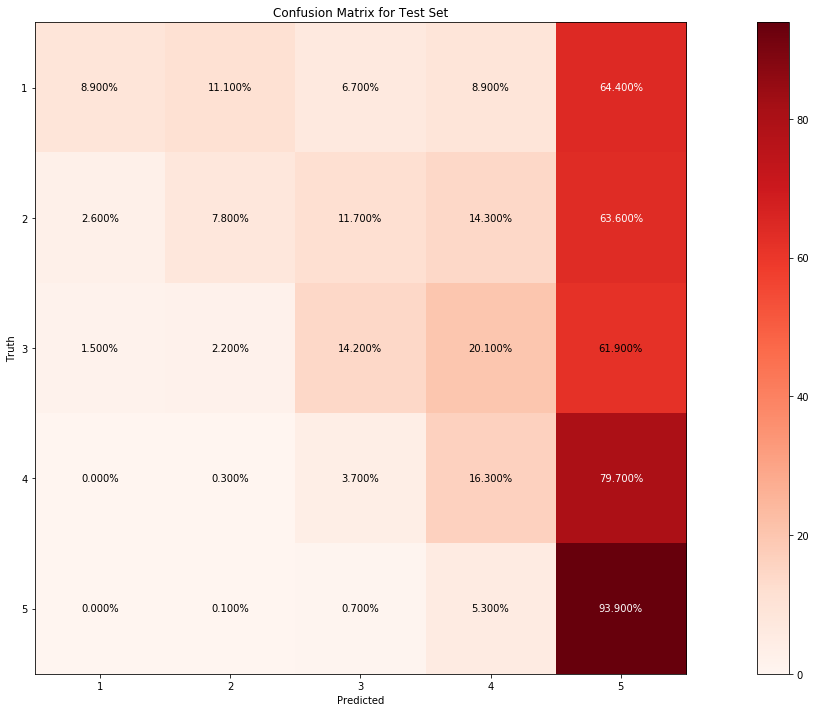

In [71]:
#create the confusion matrix of the test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [72]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [73]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")


Balanced Test Set Accuracy: 69.014%
Balanced Test Set F1 Score: 0.690


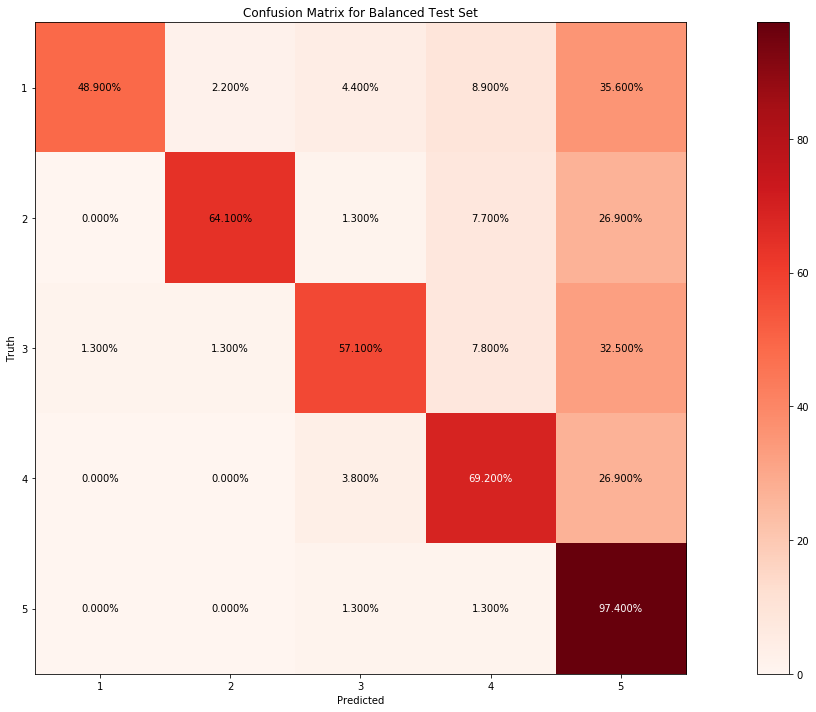

In [74]:
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

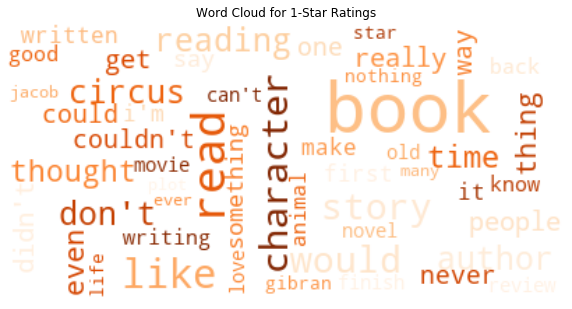

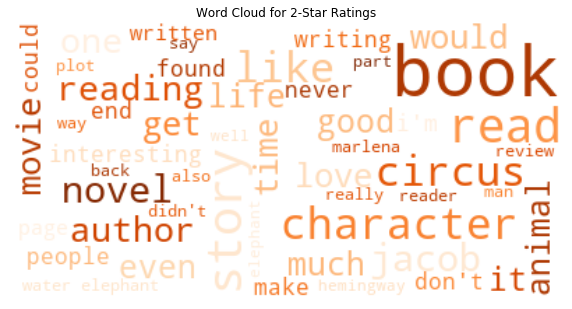

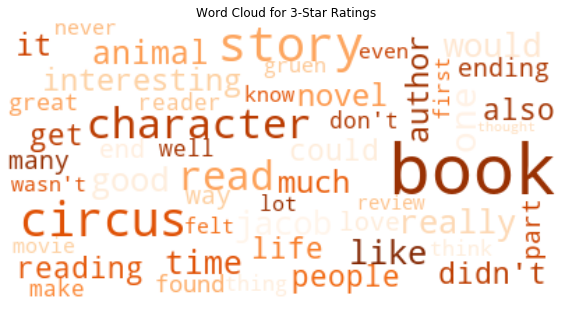

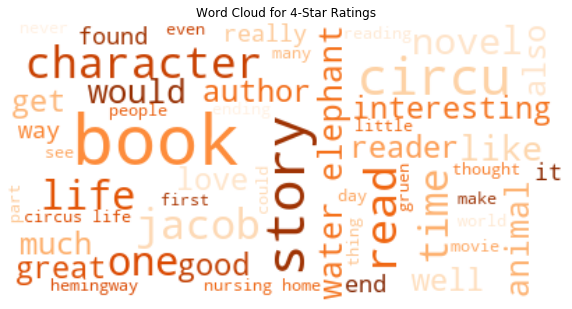

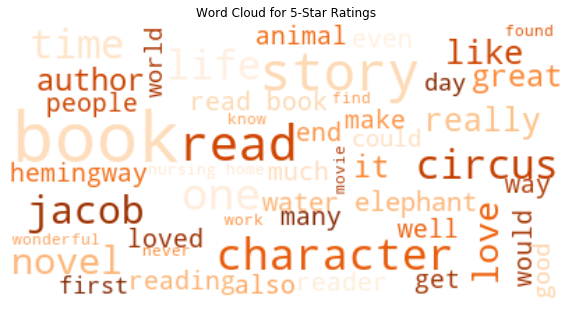

In [75]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(Data[Data["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(Data[Data["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(Data[Data["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(Data[Data["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(Data[Data["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()


In [1]:
import os
print(os.environ['PATH'])

/Applications/anaconda3/bin:/bin:.
